Impact of Federal Monetary Policy on Investments

In [1]:
# Import libraries and dependencies
import pyfolio as pf
# import alpaca_trade_api as tradeapi
import os
import json
import numpy as np
import yfinance as yf
import pandas as pd
from dotenv import load_dotenv
from MCForecastTools import MCSimulation
import seaborn as sns
import hvplot.pandas 
%matplotlib inline


# silence warnings
import warnings
warnings.filterwarnings('ignore')

/Users/robertjonathonsmart/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


In [2]:
#Read in data from YFinance with sample date range from 2002-09-30 to 2022-09-30
tickers= ["SPY", "NDAQ", "^TYX"]
new_data= list()
for ticker in tickers:
    data = yf.download(ticker, start="2002-09-30", end="2022-09-30")
    new_data.append(data)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
#Concaternate sourced data
data_df = pd.concat(new_data, axis=1, keys=["SPY", "NDAQ", "^TYX"])

In [65]:
#Clean data, check for nulls and drop them from the data frame.
data_df.isnull()
data_df.dropna()

SPY                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2002-09-30   82.000000   82.800003   80.900002   81.790001   55.707199   
2002-10-01   82.430000   85.769997   81.470001   85.720001   58.383907   
2002-10-02   84.690002   85.529999   82.599998   83.150002   56.633472   
2002-10-03   83.139999   84.599998   81.949997   82.309998   56.061356   
2002-10-04   82.800003   82.919998   79.580002   80.800003   55.032883   
...                ...         ...         ...         ...         ...   
2022-09-23  370.579987  370.619995  363.290009  367.950012  367.950012   
2022-09-26  366.410004  370.209991  363.029999  364.309998  364.309998   
2022-09-27  368.019989  370.399994  360.869995  363.380005  363.380005   
2022-09-28  364.380005  372.299988  362.600006  370.529999  370.529999   
2022-09-29  366.809998  367.109985  359.700012  362.790009  362.790009   

                            NDAQ                                              \
               Volume       Open       High        Low      Close  Adj Close   
Date                                                                           
2002-09-30   73096400   3.100000   3.116667   3.100000   3.116667   2.621037   
2002-10-01   67198100   3.166667   3.166667   3.166667   3.166667   2.663086   
2002-10-02   56749100   3.166667   3.166667   3.100000   3.156667   2.654676   
2002-10-03   55547000   3.183333   3.183333   3.183333   3.183333   2.677101   
2002-10-04   68483700   3.183333   3.183333   3.183333   3.183333   2.677101   
...               ...        ...        ...        ...        ...        ...   
2022-09-23  122210100  57.099998  57.279999  56.200001  56.930000  56.930000   
2022-09-26   92581200  56.900002  57.139999  56.290001  56.570000  56.570000   
2022-09-27  108294100  57.009998  57.310001  56.369999  56.959999  56.959999   
2022-09-28  110802200  57.250000  58.590000  56.910000  58.320000  58.320000   
2022-09-29  112952300  57.959999  58.029999  56.790001  57.110001  57.110001   

                      ^TYX                                        
             Volume   Open   High    Low  Close Adj Close Volume  
Date                                                              
2002-09-30     9300  4.666  4.668  4.618  4.662     4.662    0.0  
2002-10-01     6000  4.706  4.765  4.706  4.740     4.740    0.0  
2002-10-02    26100  4.733  4.761  4.707  4.726     4.726    0.0  
2002-10-03      300  4.715  4.760  4.707  4.742     4.742    0.0  
2002-10-04     1500  4.729  4.816  4.699  4.734     4.734    0.0  
...             ...    ...    ...    ...    ...       ...    ...  
2022-09-23  1920500  3.670  3.677  3.566  3.612     3.612    0.0  
2022-09-26  1772000  3.672  3.729  3.612  3.698     3.698    0.0  
2022-09-27  1697500  3.690  3.847  3.690  3.829     3.829    0.0  
2022-09-28  2006400  3.838  3.841  3.668  3.681     3.681    0.0  
2022-09-29  2177000  3.772  3.781  3.676  3.693     3.693    0.0  

[5029 rows x 18 columns]

In [4]:
#spy_df = pd.DataFrame(new_data[0]['Close'])
#spy_df

In [5]:
#NDAQ_df = pd.DataFrame(new_data[1]['Close'])
#NDAQ_df

In [6]:
#spy_df = pd.DataFrame(new_data[0]['Close'])
#spy_df

In [7]:
data.index=data.index.tz_localize('utc')

In [8]:
#df= data_df[['Close']]


In [9]:
#df.plot()

In [10]:
# Use the `pct_change` function to calculate daily returns for each stock
#daily_returns = df.pct_change()
#daily_returns.head()

In [11]:
# Use the `corr` function to calculate correlations for each stock pair
#correlation = daily_returns.corr()
#correlation

In [12]:
# Create a heatmap from the correlation values
#sns.heatmap(correlation)

In [13]:
# Create a heatmap from the correlation values and adjust the scale
#sns.heatmap(correlation, vmin=-1, vmax=1)

In [14]:
#daily_returns.plot(kind="line")

In [15]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns
current_forecasted_returns = MCSimulation(
    portfolio_data = data_df,
    weights = [.50,.50,.0],
    num_simulation = 500,
    num_trading_days = 252*5
)

# Print the simulation input data
current_forecasted_returns.portfolio_data.head()

SPY                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2002-09-30  82.000000  82.800003  80.900002  81.790001  55.707199  73096400   
2002-10-01  82.430000  85.769997  81.470001  85.720001  58.383907  67198100   
2002-10-02  84.690002  85.529999  82.599998  83.150002  56.633472  56749100   
2002-10-03  83.139999  84.599998  81.949997  82.309998  56.061356  55547000   
2002-10-04  82.800003  82.919998  79.580002  80.800003  55.032883  68483700   

                             NDAQ                      ...                   \
           daily_return      Open      High       Low  ... Adj Close Volume   
Date                                                   ...                    
2002-09-30          NaN  3.100000  3.116667  3.100000  ...  2.621037   9300   
2002-10-01     0.048050  3.166667  3.166667  3.166667  ...  2.663086   6000   
2002-10-02    -0.029981  3.166667  3.166667  3.100000  ...  2.654676  26100   
2002-10-03    -0.010102  3.183333  3.183333  3.183333  ...  2.677101    300   
2002-10-04    -0.018345  3.183333  3.183333  3.183333  ...  2.677101   1500   

                          ^TYX                                        \
           daily_return   Open   High    Low  Close Adj Close Volume   
Date                                                                   
2002-09-30          NaN  4.666  4.668  4.618  4.662     4.662    0.0   
2002-10-01     0.016043  4.706  4.765  4.706  4.740     4.740    0.0   
2002-10-02    -0.003158  4.733  4.761  4.707  4.726     4.726    0.0   
2002-10-03     0.008447  4.715  4.760  4.707  4.742     4.742    0.0   
2002-10-04     0.000000  4.729  4.816  4.699  4.734     4.734    0.0   

                         
           daily_return  
Date                     
2002-09-30          NaN  
2002-10-01     0.016731  
2002-10-02    -0.002954  
2002-10-03     0.003386  
2002-10-04    -0.001687  

[5 rows x 21 columns]

In [16]:
 # Run a Monte Carlo simulation to forecast five years cumulative returns
current_forecasted_returns_df = current_forecasted_returns.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

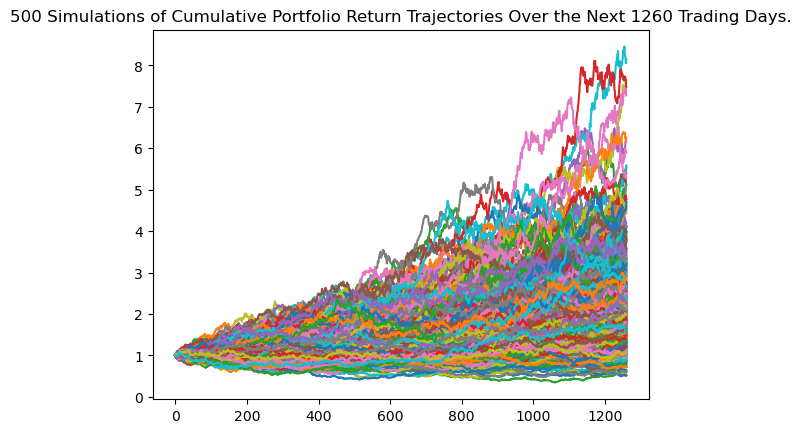

In [17]:
# Plot simulation outcomes
line_plot = current_forecasted_returns.plot_simulation()

In [18]:
#Calculate the 'mean' of each simulation
current_forecasted_returns_df.mean(axis=1)

0       1.000000
1       1.000067
2       1.000074
3       1.000988
4       1.001893
          ...   
1256    2.202351
1257    2.203602
1258    2.205679
1259    2.206039
1260    2.207557
Length: 1261, dtype: float64

<AxesSubplot:title={'center':'Average forecasted returns for current portfolio'}, xlabel='Trading Days', ylabel='Returns'>

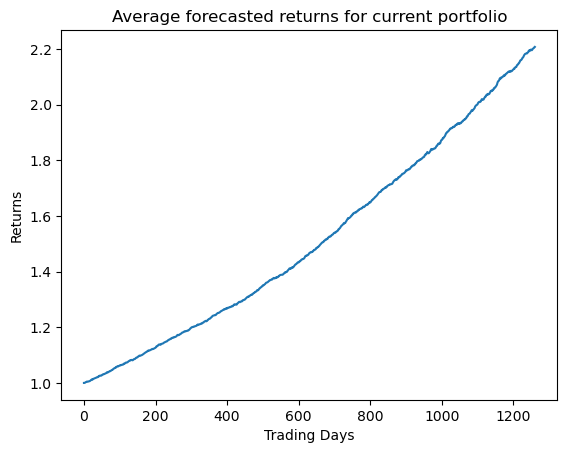

In [75]:
#Plot average returns for the current portfolio
current_forecasted_returns_df.mean(axis=1).plot(
    title="Average forecasted returns for current portfolio",
    xlabel= "Trading Days",
    ylabel= "Returns"
)

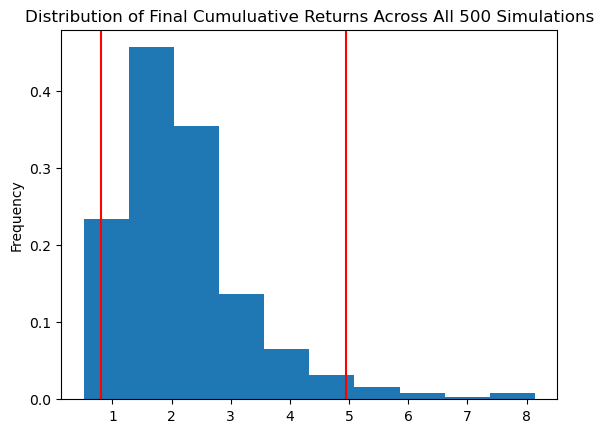

In [20]:
# Plot probability distribution and confidence intervals
portfolio_dist_plot = current_forecasted_returns.plot_distribution()

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
current_tbl = current_forecasted_returns.summarize_cumulative_return()
print(current_tbl)

count           500.000000
mean              2.207557
std               1.110015
min               0.518909
25%               1.461571
50%               1.985824
75%               2.680765
max               8.141065
95% CI Lower      0.805076
95% CI Upper      4.947701
Name: 1260, dtype: float64


In [22]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $100,000 investments in stocks
current_ci_lower = round(current_tbl[8]*100000,2)
current_ci_upper = round(current_tbl[9]*100000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $100,000 in the current portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${current_ci_lower} and ${current_ci_upper}.")

There is a 95% chance that an initial investment of $100,000 in the current portfolio over the next 5 years will end within in the range of $80507.65 and $494770.11.


In [23]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns with 60% S&P500 stock
MC_spy = MCSimulation(
    portfolio_data = data_df,
    weights = [.60,.40,.0],
    num_simulation = 500,
    num_trading_days = 252*5)

# Print the simulation input data
MC_spy.portfolio_data.head()

SPY                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2002-09-30  82.000000  82.800003  80.900002  81.790001  55.707199  73096400   
2002-10-01  82.430000  85.769997  81.470001  85.720001  58.383907  67198100   
2002-10-02  84.690002  85.529999  82.599998  83.150002  56.633472  56749100   
2002-10-03  83.139999  84.599998  81.949997  82.309998  56.061356  55547000   
2002-10-04  82.800003  82.919998  79.580002  80.800003  55.032883  68483700   

                             NDAQ                      ...                   \
           daily_return      Open      High       Low  ... Adj Close Volume   
Date                                                   ...                    
2002-09-30          NaN  3.100000  3.116667  3.100000  ...  2.621037   9300   
2002-10-01     0.048050  3.166667  3.166667  3.166667  ...  2.663086   6000   
2002-10-02    -0.029981  3.166667  3.166667  3.100000  ...  2.654676  26100   
2002-10-03    -0.010102  3.183333  3.183333  3.183333  ...  2.677101    300   
2002-10-04    -0.018345  3.183333  3.183333  3.183333  ...  2.677101   1500   

                          ^TYX                                        \
           daily_return   Open   High    Low  Close Adj Close Volume   
Date                                                                   
2002-09-30          NaN  4.666  4.668  4.618  4.662     4.662    0.0   
2002-10-01     0.016043  4.706  4.765  4.706  4.740     4.740    0.0   
2002-10-02    -0.003158  4.733  4.761  4.707  4.726     4.726    0.0   
2002-10-03     0.008447  4.715  4.760  4.707  4.742     4.742    0.0   
2002-10-04     0.000000  4.729  4.816  4.699  4.734     4.734    0.0   

                         
           daily_return  
Date                     
2002-09-30          NaN  
2002-10-01     0.016731  
2002-10-02    -0.002954  
2002-10-03     0.003386  
2002-10-04    -0.001687  

[5 rows x 21 columns]

In [24]:
# Run a Monte Carlo simulation to forecast five years cumulative returns with 60% S&P500 stock
spy_weighted_returns_df = MC_spy.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

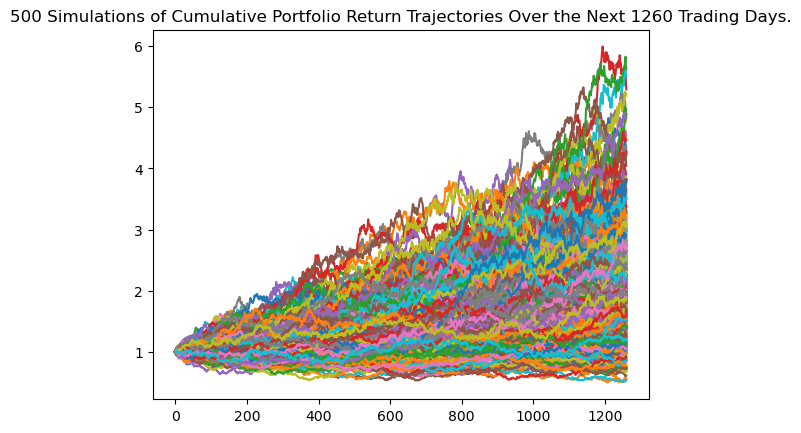

In [25]:
# Plot simulation outcomes
spy_line_plot = MC_spy.plot_simulation()

In [26]:
#Calculate the 'mean' of each simulation
spy_weighted_returns_df.mean(axis=1)

0       1.000000
1       1.001739
2       1.002587
3       1.002753
4       1.003074
          ...   
1256    2.058608
1257    2.060888
1258    2.062662
1259    2.063189
1260    2.062257
Length: 1261, dtype: float64

In [76]:
#Plot average returns for 60% S&P500 portfolio
spy_weighted_returns_df.mean(axis=1).plot(
   title="Average forecasted returns for 60% S&P500 portfolio",
    xlabel= "Trading Days",
    ylabel= "Returns"
)

<AxesSubplot:title={'center':'Average forecasted returns for 60% S&P500 portfolio'}, xlabel='Trading Days', ylabel='Returns'>

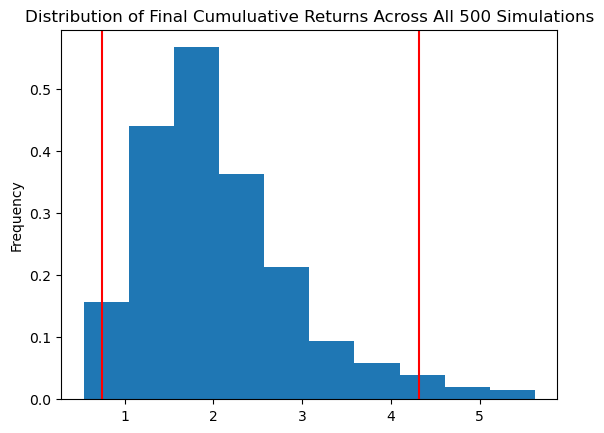

In [28]:
# Plot probability distribution and confidence intervals
spy_portfolio_dist_plot = MC_spy.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
spy_tbl = MC_spy.summarize_cumulative_return()
print(spy_tbl)

count           500.000000
mean              2.062257
std               0.887867
min               0.542154
25%               1.433242
50%               1.922580
75%               2.473562
max               5.622465
95% CI Lower      0.742739
95% CI Upper      4.314693
Name: 1260, dtype: float64


In [30]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $100,000 investments in stocks
spy_ci_lower = round(spy_tbl[8]*100000,2)
spy_ci_upper = round(spy_tbl[9]*100000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $100,000 in the 60% S&P500 portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${spy_ci_lower} and ${spy_ci_upper}.")

There is a 95% chance that an initial investment of $100,000 in the 60% S&P500 portfolio over the next 5 years will end within in the range of $74273.87 and $431469.32.


In [31]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns with 60% NASDAQ stock
MC_ndaq = MCSimulation(
    portfolio_data = data_df,
    weights = [.40,.60,.0],
    num_simulation = 500,
    num_trading_days = 252*5)

# Print the simulation input data
MC_ndaq.portfolio_data.head()

SPY                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2002-09-30  82.000000  82.800003  80.900002  81.790001  55.707199  73096400   
2002-10-01  82.430000  85.769997  81.470001  85.720001  58.383907  67198100   
2002-10-02  84.690002  85.529999  82.599998  83.150002  56.633472  56749100   
2002-10-03  83.139999  84.599998  81.949997  82.309998  56.061356  55547000   
2002-10-04  82.800003  82.919998  79.580002  80.800003  55.032883  68483700   

                             NDAQ                      ...                   \
           daily_return      Open      High       Low  ... Adj Close Volume   
Date                                                   ...                    
2002-09-30          NaN  3.100000  3.116667  3.100000  ...  2.621037   9300   
2002-10-01     0.048050  3.166667  3.166667  3.166667  ...  2.663086   6000   
2002-10-02    -0.029981  3.166667  3.166667  3.100000  ...  2.654676  26100   
2002-10-03    -0.010102  3.183333  3.183333  3.183333  ...  2.677101    300   
2002-10-04    -0.018345  3.183333  3.183333  3.183333  ...  2.677101   1500   

                          ^TYX                                        \
           daily_return   Open   High    Low  Close Adj Close Volume   
Date                                                                   
2002-09-30          NaN  4.666  4.668  4.618  4.662     4.662    0.0   
2002-10-01     0.016043  4.706  4.765  4.706  4.740     4.740    0.0   
2002-10-02    -0.003158  4.733  4.761  4.707  4.726     4.726    0.0   
2002-10-03     0.008447  4.715  4.760  4.707  4.742     4.742    0.0   
2002-10-04     0.000000  4.729  4.816  4.699  4.734     4.734    0.0   

                         
           daily_return  
Date                     
2002-09-30          NaN  
2002-10-01     0.016731  
2002-10-02    -0.002954  
2002-10-03     0.003386  
2002-10-04    -0.001687  

[5 rows x 21 columns]

In [32]:
# Run a Monte Carlo simulation to forecast five years cumulative returns with 60% NASDAQ stock
ndaq_weighted_returns_df = MC_ndaq.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

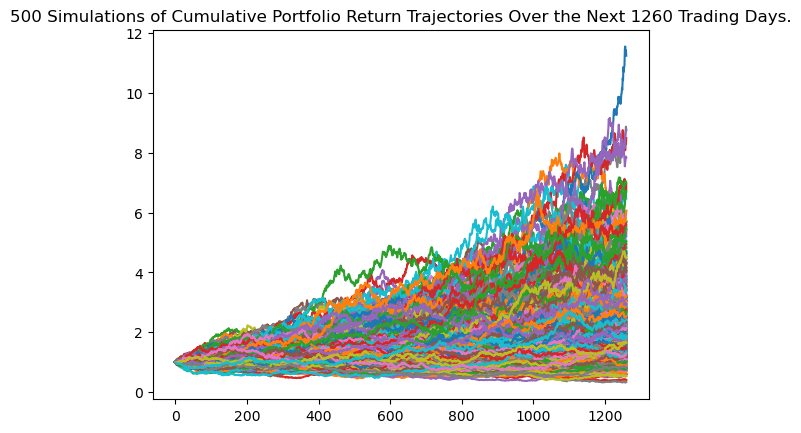

In [33]:
# Plot simulation outcomes
ndaq_line_plot = MC_ndaq.plot_simulation()

In [34]:
#Calculate the 'mean' of each simulation
ndaq_weighted_returns_df.mean(axis=1)

0       1.000000
1       1.000148
2       1.001075
3       1.001573
4       1.002031
          ...   
1256    2.397642
1257    2.402910
1258    2.403394
1259    2.406970
1260    2.411136
Length: 1261, dtype: float64

In [77]:
#Plot average returns for 60% NASDQ portfolio
ndaq_weighted_returns_df.mean(axis=1).plot(
    title="Average forecasted returns for 60% NASDQ portfolio",
    xlabel= "Trading Days",
    ylabel= "Returns"
)


<AxesSubplot:title={'center':'Average forecasted returns for 60% NASDQ portfolio'}, xlabel='Trading Days', ylabel='Returns'>

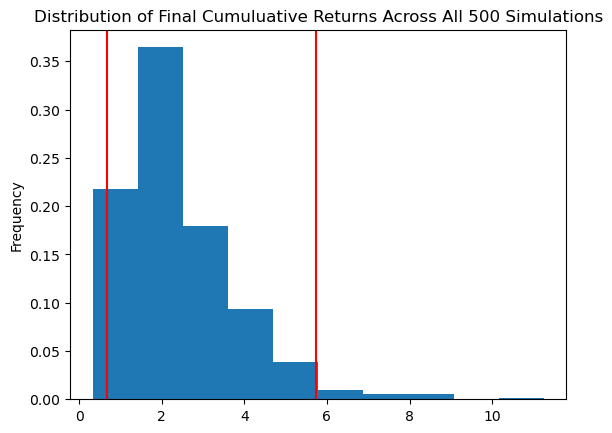

In [36]:
# Plot probability distribution and confidence intervals
ndaq_portfolio_dist_plot = MC_ndaq.plot_distribution()

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results
ndaq_tbl = MC_ndaq.summarize_cumulative_return()
print(ndaq_tbl)

count           500.000000
mean              2.411136
std               1.436502
min               0.331277
25%               1.474905
50%               2.071703
75%               3.035313
max              11.250363
95% CI Lower      0.678910
95% CI Upper      5.729207
Name: 1260, dtype: float64


In [38]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $100,000 investments in stocks
ndaq_ci_lower = round(ndaq_tbl[8]*100000,2)
ndaq_ci_upper = round(ndaq_tbl[9]*100000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $100,000 in the 60% NASDAQ portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ndaq_ci_lower} and ${ndaq_ci_upper}.")

There is a 95% chance that an initial investment of $100,000 in the 60% NASDAQ portfolio over the next 5 years will end within in the range of $67891.0 and $572920.7.


In [39]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns with 70% S&P500 stock
MC_hv_spy = MCSimulation(
    portfolio_data = data_df,
    weights = [.70,.30,.0],
    num_simulation = 500,
    num_trading_days = 252*5)

# Print the simulation input data
MC_hv_spy.portfolio_data.head()

SPY                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2002-09-30  82.000000  82.800003  80.900002  81.790001  55.707199  73096400   
2002-10-01  82.430000  85.769997  81.470001  85.720001  58.383907  67198100   
2002-10-02  84.690002  85.529999  82.599998  83.150002  56.633472  56749100   
2002-10-03  83.139999  84.599998  81.949997  82.309998  56.061356  55547000   
2002-10-04  82.800003  82.919998  79.580002  80.800003  55.032883  68483700   

                             NDAQ                      ...                   \
           daily_return      Open      High       Low  ... Adj Close Volume   
Date                                                   ...                    
2002-09-30          NaN  3.100000  3.116667  3.100000  ...  2.621037   9300   
2002-10-01     0.048050  3.166667  3.166667  3.166667  ...  2.663086   6000   
2002-10-02    -0.029981  3.166667  3.166667  3.100000  ...  2.654676  26100   
2002-10-03    -0.010102  3.183333  3.183333  3.183333  ...  2.677101    300   
2002-10-04    -0.018345  3.183333  3.183333  3.183333  ...  2.677101   1500   

                          ^TYX                                        \
           daily_return   Open   High    Low  Close Adj Close Volume   
Date                                                                   
2002-09-30          NaN  4.666  4.668  4.618  4.662     4.662    0.0   
2002-10-01     0.016043  4.706  4.765  4.706  4.740     4.740    0.0   
2002-10-02    -0.003158  4.733  4.761  4.707  4.726     4.726    0.0   
2002-10-03     0.008447  4.715  4.760  4.707  4.742     4.742    0.0   
2002-10-04     0.000000  4.729  4.816  4.699  4.734     4.734    0.0   

                         
           daily_return  
Date                     
2002-09-30          NaN  
2002-10-01     0.016731  
2002-10-02    -0.002954  
2002-10-03     0.003386  
2002-10-04    -0.001687  

[5 rows x 21 columns]

In [40]:
# Run a Monte Carlo simulation to forecast five years cumulative returns with 70% S&P500 stock
spy_hv_weighted_returns_df = MC_hv_spy.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

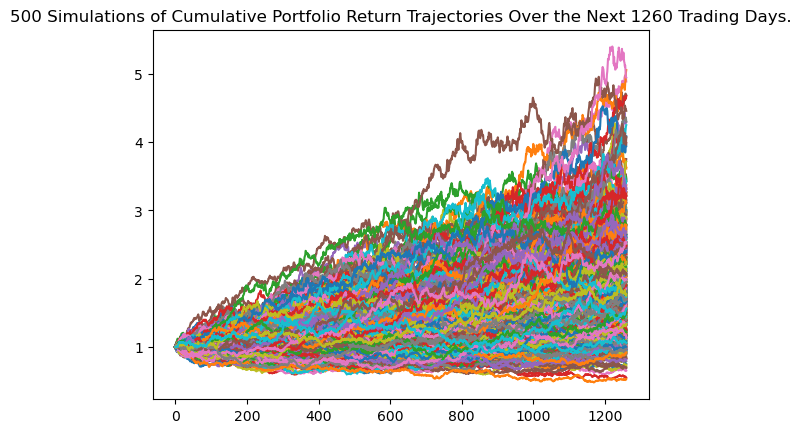

In [41]:
# Plot simulation outcomes
spy_hv_line_plot = MC_hv_spy.plot_simulation()

In [42]:
#Calculate the 'mean' of each simulation
spy_hv_weighted_returns_df.mean(axis=1)

0       1.000000
1       1.001872
2       1.002795
3       1.003637
4       1.003396
          ...   
1256    1.910105
1257    1.911228
1258    1.911288
1259    1.913220
1260    1.914737
Length: 1261, dtype: float64

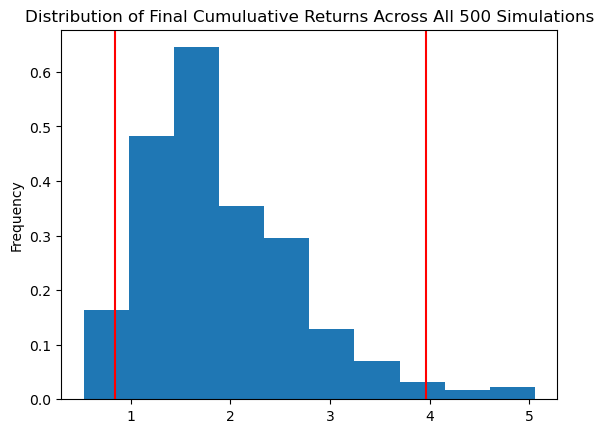

In [43]:
# Plot probability distribution and confidence intervals
spy_hv_portfolio_dist_plot = MC_hv_spy.plot_distribution()

In [44]:
# Fetch summary statistics from the Monte Carlo simulation results
spy_hv_tbl = MC_hv_spy.summarize_cumulative_return()
print(ndaq_tbl)

count           500.000000
mean              2.411136
std               1.436502
min               0.331277
25%               1.474905
50%               2.071703
75%               3.035313
max              11.250363
95% CI Lower      0.678910
95% CI Upper      5.729207
Name: 1260, dtype: float64


<AxesSubplot:title={'center':'Average forecasted returns for Heavy Weighted SPY portfolio'}, xlabel='Trading Days', ylabel='Returns'>

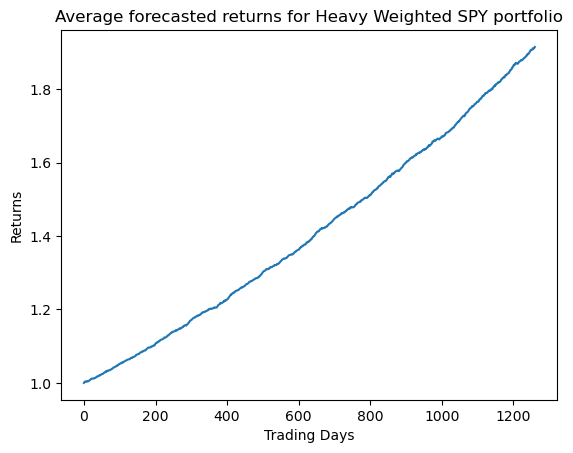

In [78]:
#Plot average returns for Heavy Weighted SPY portfolio
spy_hv_weighted_returns_df.mean(axis=1).plot(
    title="Average forecasted returns for Heavy Weighted SPY portfolio",
    xlabel= "Trading Days",
    ylabel= "Returns"
)

In [46]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $100,000 investments in stocks
spy_hv_ci_lower = round(spy_hv_tbl[8]*100000,2)
spy_hv_ci_upper = round(spy_hv_tbl[9]*100000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $100,000 in the Heavy Weighted SPY portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${spy_hv_ci_lower} and ${spy_hv_ci_upper}.")

There is a 95% chance that an initial investment of $100,000 in the Heavy Weighted SPY portfolio over the next 5 years will end within in the range of $83844.46 and $396634.82.


In [47]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns with 70% NASDAQ stock
MC_hv_ndaq = MCSimulation(
    portfolio_data = data_df,
    weights = [.30,.70,.0],
    num_simulation = 500,
    num_trading_days = 252*5)

# Print the simulation input data
MC_hv_spy.portfolio_data.head()

SPY                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2002-09-30  82.000000  82.800003  80.900002  81.790001  55.707199  73096400   
2002-10-01  82.430000  85.769997  81.470001  85.720001  58.383907  67198100   
2002-10-02  84.690002  85.529999  82.599998  83.150002  56.633472  56749100   
2002-10-03  83.139999  84.599998  81.949997  82.309998  56.061356  55547000   
2002-10-04  82.800003  82.919998  79.580002  80.800003  55.032883  68483700   

                             NDAQ                      ...                   \
           daily_return      Open      High       Low  ... Adj Close Volume   
Date                                                   ...                    
2002-09-30          NaN  3.100000  3.116667  3.100000  ...  2.621037   9300   
2002-10-01     0.048050  3.166667  3.166667  3.166667  ...  2.663086   6000   
2002-10-02    -0.029981  3.166667  3.166667  3.100000  ...  2.654676  26100   
2002-10-03    -0.010102  3.183333  3.183333  3.183333  ...  2.677101    300   
2002-10-04    -0.018345  3.183333  3.183333  3.183333  ...  2.677101   1500   

                          ^TYX                                        \
           daily_return   Open   High    Low  Close Adj Close Volume   
Date                                                                   
2002-09-30          NaN  4.666  4.668  4.618  4.662     4.662    0.0   
2002-10-01     0.016043  4.706  4.765  4.706  4.740     4.740    0.0   
2002-10-02    -0.003158  4.733  4.761  4.707  4.726     4.726    0.0   
2002-10-03     0.008447  4.715  4.760  4.707  4.742     4.742    0.0   
2002-10-04     0.000000  4.729  4.816  4.699  4.734     4.734    0.0   

                         
           daily_return  
Date                     
2002-09-30          NaN  
2002-10-01     0.016731  
2002-10-02    -0.002954  
2002-10-03     0.003386  
2002-10-04    -0.001687  

[5 rows x 21 columns]

In [48]:
# Run a Monte Carlo simulation to forecast five years cumulative returns with 70% NASDAQ stock
ndaq_hv_weighted_returns_df = MC_hv_ndaq.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

In [49]:
ndaq_hv_weighted_returns_df.describe()

0            1            2            3            4    \
count  1261.000000  1261.000000  1261.000000  1261.000000  1261.000000   
mean      2.037602     1.055340     1.056943     1.471155     1.238577   
std       0.854223     0.124392     0.254241     0.369954     0.207522   
min       0.808860     0.799422     0.632837     0.827212     0.711322   
25%       1.185677     0.965083     0.888649     1.166172     1.054928   
50%       2.026934     1.026579     1.049675     1.403223     1.249998   
75%       2.782679     1.146474     1.178797     1.743297     1.393830   
max       3.672817     1.404708     2.010376     2.386828     1.788188   

               5            6            7            8            9    ...  \
count  1261.000000  1261.000000  1261.000000  1261.000000  1261.000000  ...   
mean      1.402503     2.199678     1.312209     2.691924     2.122445  ...   
std       0.387114     0.713541     0.217407     1.415118     0.998523  ...   
min       0.754868     0.990400     0.847072     1.000000     0.938872  ...   
25%       0.988688     1.607561     1.153074     1.264117     1.233991  ...   
50%       1.459313     2.089264     1.318126     2.395483     2.109891  ...   
75%       1.681873     2.903747     1.464259     4.031224     2.558180  ...   
max       2.313469     3.751685     1.825030     5.625442     5.313926  ...   

               490          491          492          493          494  \
count  1261.000000  1261.000000  1261.000000  1261.000000  1261.000000   
mean      1.524824     2.054734     1.751163     1.028163     0.775193   
std       0.498588     0.813373     0.734000     0.140418     0.088444   
min       0.763577     0.877505     0.723743     0.748985     0.615512   
25%       1.022410     1.396697     1.019142     0.920413     0.709735   
50%       1.572874     1.792667     1.940391     1.035100     0.757069   
75%       1.925333     2.617234     2.365838     1.118377     0.825466   
max       2.565707     4.305650     3.477598     1.366334     1.012307   

               495          496          497          498          499  
count  1261.000000  1261.000000  1261.000000  1261.000000  1261.000000  
mean      1.206071     2.257463     1.979377     1.211235     1.832148  
std       0.224539     0.923126     0.988454     0.251267     0.385937  
min       0.835769     0.809446     0.803885     0.776450     0.986567  
25%       0.991663     1.578011     1.067582     0.997844     1.482400  
50%       1.227064     2.396236     1.561902     1.172848     1.884058  
75%       1.351858     2.900931     2.896974     1.417903     2.154997  
max       1.775114     4.251558     4.229646     1.839910     2.625740  

[8 rows x 500 columns]

In [50]:
ndaq_hv_weighted_returns_df.mean()

0      2.037602
1      1.055340
2      1.056943
3      1.471155
4      1.238577
         ...   
495    1.206071
496    2.257463
497    1.979377
498    1.211235
499    1.832148
Length: 500, dtype: float64

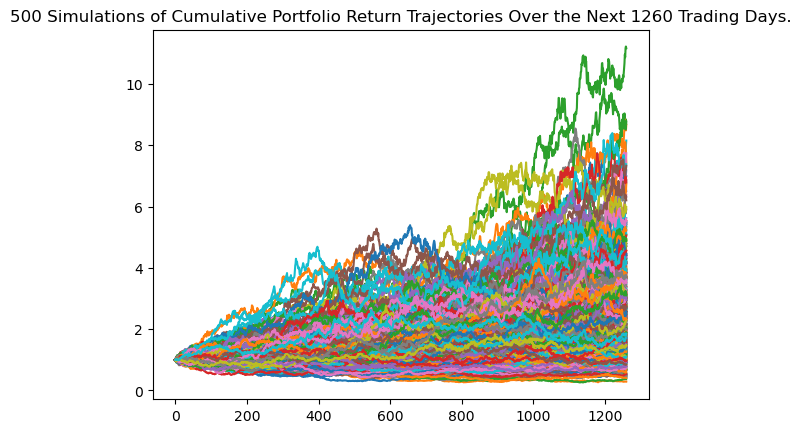

In [51]:
# Plot simulation outcomes
ndaq_hv_line_plot = MC_hv_ndaq.plot_simulation()

In [52]:
#Calculate the 'mean' of each simulation
ndaq_hv_weighted_returns_df.mean(axis=1)

0       1.000000
1       1.001444
2       1.003712
3       1.003911
4       1.004580
          ...   
1256    2.442756
1257    2.447189
1258    2.449280
1259    2.449689
1260    2.452927
Length: 1261, dtype: float64

<AxesSubplot:title={'center':'Average forecasted returns for Heavy Weighted NDAQ portfolio'}, xlabel='Trading Days', ylabel='Returns'>

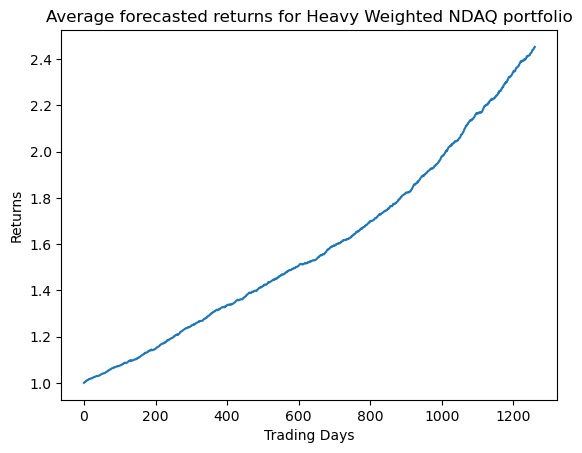

In [79]:
#Plot average returns for Heavy Weighted NDAQ portfolio
ndaq_hv_weighted_returns_df.mean(axis=1).plot(
    title="Average forecasted returns for Heavy Weighted NDAQ portfolio",
    xlabel= "Trading Days",
    ylabel= "Returns"
)

In [54]:
# Fetch summary statistics from the Monte Carlo simulation results
ndaq_hv_tbl = MC_hv_ndaq.summarize_cumulative_return()
print(ndaq_tbl)

count           500.000000
mean              2.411136
std               1.436502
min               0.331277
25%               1.474905
50%               2.071703
75%               3.035313
max              11.250363
95% CI Lower      0.678910
95% CI Upper      5.729207
Name: 1260, dtype: float64


In [55]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $100,000 investments in stocks
ndaq_hv_ci_lower = round(ndaq_hv_tbl[8]*100000,2)
ndaq_hv_ci_upper = round(ndaq_hv_tbl[9]*100000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $100,000 in the heavy weighted NDAQ portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ndaq_hv_ci_lower} and ${ndaq_hv_ci_upper}.")

There is a 95% chance that an initial investment of $100,000 in the heavy weighted NDAQ portfolio over the next 5 years will end within in the range of $58347.03 and $676593.59.


In [56]:
#Calculate the average return for all portfolios
current_portfolio = current_forecasted_returns_df.mean(axis=1)
spy_portfolio = spy_weighted_returns_df.mean(axis=1)
ndaq_portfolio = ndaq_weighted_returns_df.mean(axis=1)
hv_spy_portfolio = spy_hv_weighted_returns_df.mean(axis=1)
hv_ndaq_porfolio = ndaq_hv_weighted_returns_df.mean(axis=1)
print(current_portfolio, spy_portfolio, ndaq_portfolio, hv_spy_portfolio, hv_ndaq_porfolio)

0       1.000000
1       1.000067
2       1.000074
3       1.000988
4       1.001893
          ...   
1256    2.202351
1257    2.203602
1258    2.205679
1259    2.206039
1260    2.207557
Length: 1261, dtype: float64 0       1.000000
1       1.001739
2       1.002587
3       1.002753
4       1.003074
          ...   
1256    2.058608
1257    2.060888
1258    2.062662
1259    2.063189
1260    2.062257
Length: 1261, dtype: float64 0       1.000000
1       1.000148
2       1.001075
3       1.001573
4       1.002031
          ...   
1256    2.397642
1257    2.402910
1258    2.403394
1259    2.406970
1260    2.411136
Length: 1261, dtype: float64 0       1.000000
1       1.001872
2       1.002795
3       1.003637
4       1.003396
          ...   
1256    1.910105
1257    1.911228
1258    1.911288
1259    1.913220
1260    1.914737
Length: 1261, dtype: float64 0       1.000000
1       1.001444
2       1.003712
3       1.003911
4       1.004580
          ...   
1256    2.442756
1257    2.447189


In [57]:
#Combine Portfolio Average Returns
combined_df = pd.concat((current_portfolio, spy_portfolio, ndaq_portfolio, hv_spy_portfolio, hv_ndaq_porfolio), axis=1, keys=["Current Portfolio", "SPY Portfolio", "NDAQ Portfolio", "Heavy Weighted SPY Portfolio", "Heavy Weighted NDAQ Portfolio"])
combined_df

Current Portfolio  SPY Portfolio  NDAQ Portfolio  \
0              1.000000       1.000000        1.000000   
1              1.000067       1.001739        1.000148   
2              1.000074       1.002587        1.001075   
3              1.000988       1.002753        1.001573   
4              1.001893       1.003074        1.002031   
...                 ...            ...             ...   
1256           2.202351       2.058608        2.397642   
1257           2.203602       2.060888        2.402910   
1258           2.205679       2.062662        2.403394   
1259           2.206039       2.063189        2.406970   
1260           2.207557       2.062257        2.411136   

      Heavy Weighted SPY Portfolio  Heavy Weighted NDAQ Portfolio  
0                         1.000000                       1.000000  
1                         1.001872                       1.001444  
2                         1.002795                       1.003712  
3                         1.003637                       1.003911  
4                         1.003396                       1.004580  
...                            ...                            ...  
1256                      1.910105                       2.442756  
1257                      1.911228                       2.447189  
1258                      1.911288                       2.449280  
1259                      1.913220                       2.449689  
1260                      1.914737                       2.452927  

[1261 rows x 5 columns]

In [84]:
#Plot all portfolio's average return
potfolios_overview = combined_df/combined_df.iloc[0]
potfolios_overview.hvplot(
    xlabel="Tradings Days", 
    ylabel="Average Return('mean')",
    title= "Simulated Portfolio's Average forecasted Return Overview",
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)